Coca-Cola Stock Analysis and Live Price Prediction


Description:

In this project, I explored and analyzed historical stock data for The Coca-Cola Company using Python. The goal was to understand trends in the stock's performance, uncover insights through visualizations, and build a machine learning model that can predict future closing prices.

I started by collecting data using the Yahoo Finance API, then cleaned and processed it using pandas. I performed exploratory data analysis (EDA) to identify key patterns — like moving averages, daily returns, and volatility — and visualized these using Matplotlib and Seaborn.

To predict stock prices, I trained a Random Forest Regressor model. I also created a live prediction system that fetches real-time data and updates predictions instantly. On top of that, I used technical indicators (like EMA, MACD, and RSI) with the help of the FINTA library, and tested trading strategies using backtesting.
This project demonstrates how data analysis, finance, and machine learning can come together to make smarter investing decisions.

In [1]:
# =======<<<<<< Imports >>>>>>=======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import streamlit as st


In [2]:
# =======<<<<<< Load Your Local Datasets >>>>>>=======
# Historical Stock Data
history = pd.read_excel("Coca-Cola_stock_history.xlsx")

# Company Info (if needed for report/display)
info = pd.read_csv("Coca-Cola_stock_info.csv")

# Preview
print(history.head())
print(info.head())


                  Date      Open      High       Low     Close   Volume  \
0  1962-01-02 00:00:00  0.050016  0.051378  0.050016  0.050016   806400   
1  1962-01-03 00:00:00  0.049273  0.049273  0.048159  0.048902  1574400   
2  1962-01-04 00:00:00  0.049026  0.049645  0.049026  0.049273   844800   
3  1962-01-05 00:00:00  0.049273  0.049892  0.048035  0.048159  1420800   
4  1962-01-08 00:00:00  0.047787  0.047787  0.046735  0.047664  2035200   

   Dividends  Stock Splits  
0        0.0             0  
1        0.0             0  
2        0.0             0  
3        0.0             0  
4        0.0             0  
                   Key                                              Value
0                  zip                                              30313
1               sector                                 Consumer Defensive
2    fullTimeEmployees                                              80300
3  longBusinessSummary  The Coca-Cola Company, a beverage company, man...
4    

In [3]:
# =======<<<<<< Clean and Prepare Data >>>>>>=======
history.dropna(subset=["Close"], inplace=True)
history.fillna(method='ffill', inplace=True)
history.fillna(0, inplace=True)

# Convert 'Date' to datetime if not already
history['Date'] = pd.to_datetime(history['Date'], utc=True)


C:\Users\kalya\AppData\Local\Temp\ipykernel_27284\3428244799.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  history.fillna(method='ffill', inplace=True)


In [4]:
# Feature Engineering
history['MA_20'] = history['Close'].rolling(window=20).mean()
history['MA_50'] = history['Close'].rolling(window=50).mean()
history['Daily_Return'] = history['Close'].pct_change()
history['Volatility'] = history['Daily_Return'].rolling(window=20).std()
history.dropna(inplace=True)


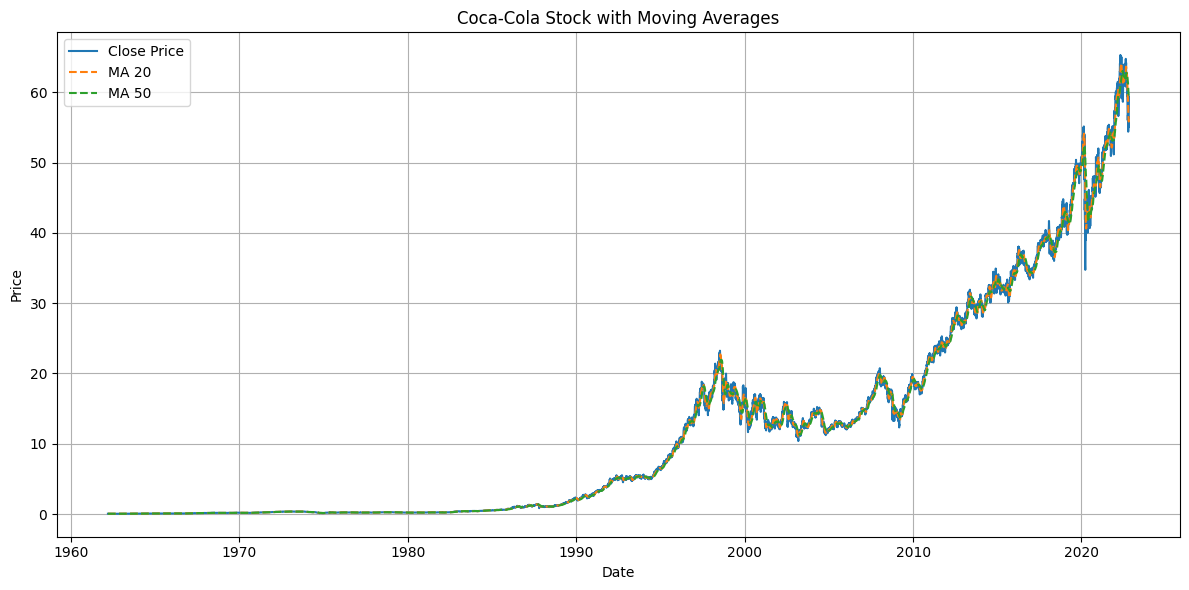

In [5]:
# =======<<<<<< EDA Plots >>>>>>=======
plt.figure(figsize=(12, 6))
plt.plot(history['Date'], history['Close'], label='Close Price')
plt.plot(history['Date'], history['MA_20'], '--', label='MA 20')
plt.plot(history['Date'], history['MA_50'], '--', label='MA 50')
plt.title('Coca-Cola Stock with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



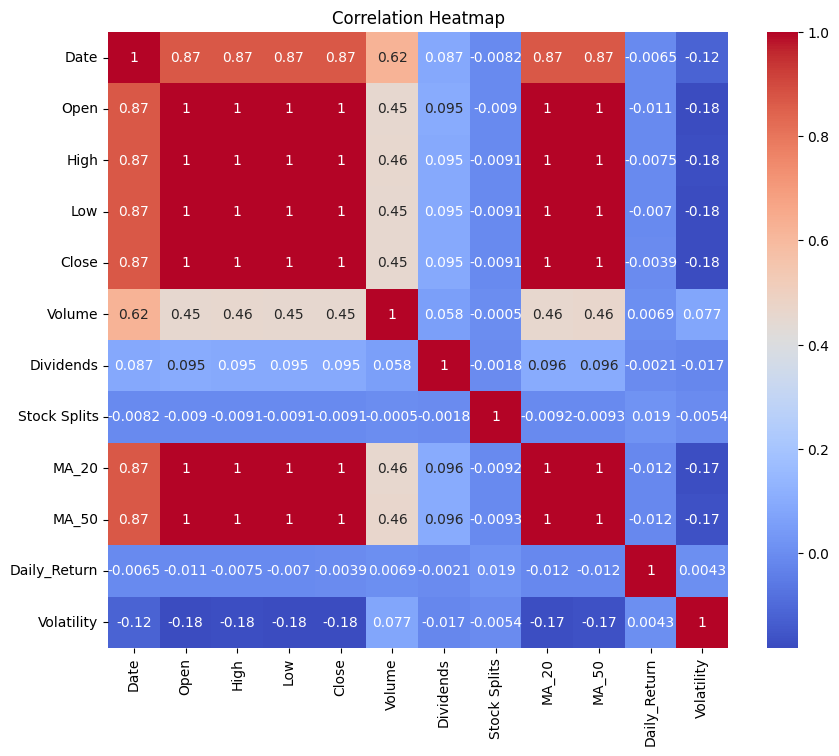

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(history.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

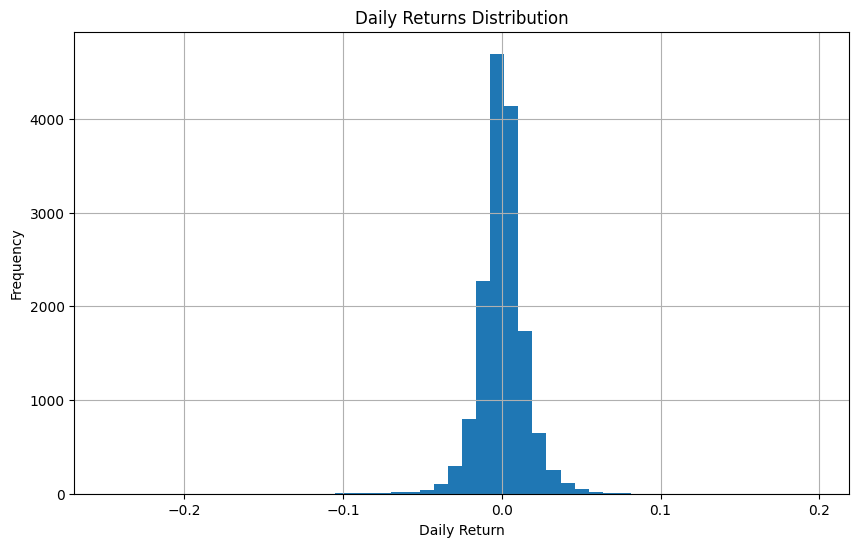

In [7]:
plt.figure(figsize=(10,6))
history['Daily_Return'].hist(bins=50)
plt.title("Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


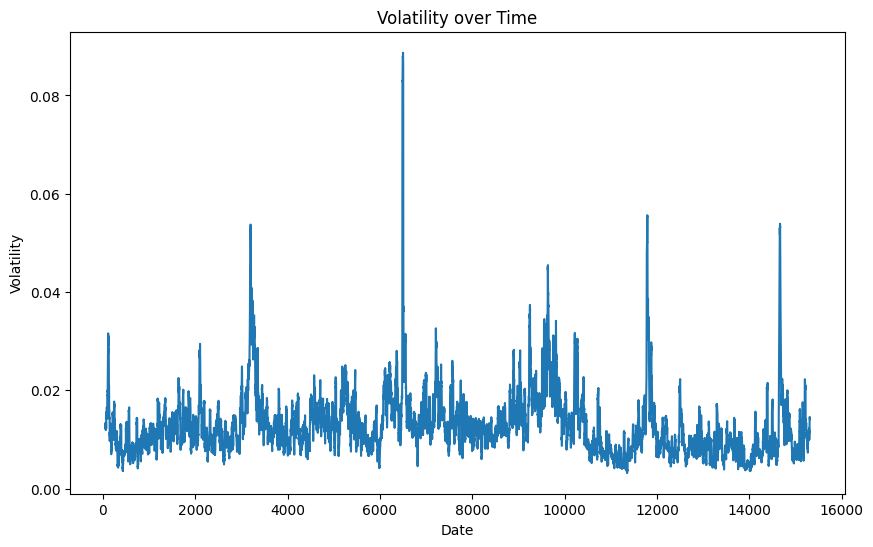

In [8]:
plt.figure(figsize=(10,6))
history['Volatility'].plot()
plt.title("Volatility over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


In [9]:
# =======<<<<<< Model Training >>>>>>=======
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
X = history[features]
y = history['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))



Mean Absolute Error: 14.669374621065108
Mean Squared Error: 327.97684445274587
